[View in Colaboratory](https://colab.research.google.com/github/Sounak97/Assignment-4/blob/Sounak97/Sounak97.ipynb)

In [0]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

Defining tensors


In [0]:
t1=tf.constant(2.0,dtype=tf.float32)
t2=tf.constant([1.0,2.0],dtype=tf.float32)
t3=tf.constant([[[1.0,9.0],[2.0,3.0],[4.0,5.0]],[[1.0,9.0],[2.0,3.0],[4.0,5.0]]])


In [45]:
print(t1)
print(t2)
print(t3)

Tensor("Const_15:0", shape=(), dtype=float32)
Tensor("Const_16:0", shape=(2,), dtype=float32)
Tensor("Const_17:0", shape=(2, 3, 2), dtype=float32)


Using sessions to get the values ofmthe tensors

In [46]:
sess = tf.Session()
print (sess.run(t1))
print ("=======================")
print (sess.run(t2))
print ("=======================")
print (sess.run(t3))
sess.close()

2.0
[1. 2.]
[[[1. 9.]
  [2. 3.]
  [4. 5.]]

 [[1. 9.]
  [2. 3.]
  [4. 5.]]]


Computational Graph Example 1

In [47]:
#process1
comp_graph_ex1=tf.multiply(tf.add(78.0,19.0),79)#no dtype needed when casting not used
#process 2
comp_graph_ex1alt=(tf.constant(78)+tf.constant(19))*tf.constant(79)
sess=tf.Session()
print(sess.run(comp_graph_ex1))
print(sess.run(comp_graph_ex1alt))
sess.close()


7663.0
7663


Bulding the second example graph

In [48]:
comp2_part1=tf.cast(tf.subtract(tf.add(7,8),tf.add(9,10)),dtype=tf.float32)
sess=tf.Session()
print(sess.run(comp2_part1))
sess.close()

-4.0


In [49]:
comp2_part2=tf.divide(tf.cast(tf.multiply(7,10),dtype=tf.float32),tf.constant(19.5))
sess=tf.Session()
print(sess.run(comp2_part2))
sess.close()

3.5897436


In [50]:
comp2_full=tf.maximum(comp2_part1,comp2_part2)
sess=tf.Session()
print(sess.run(comp2_full))
sess.close()

3.5897436


Evaluating test graph 1

In [0]:
test1_node1=tf.constant([9,10],dtype=tf.float32,name="leaf1")
test1_node2=tf.constant([7,8.65],dtype=tf.float32,name="leaf2")
test1_node3=tf.constant([7.65,9],dtype=tf.float32,name="leaf3")
test1_node4=tf.constant([13.5,7.18],dtype=tf.float32,name="leaf4")



In [0]:
test1_res1=tf.multiply(test1_node1,test1_node2)
test1_sf1=tf.divide(test1_res1,5.6)
test1_sf2=tf.add(test1_node3,test1_node4)
test1_ans=tf.minimum(test1_sf1,test1_sf2)

In [53]:
sess=tf.Session()
print(sess.run(test1_ans))
sess.close()

[11.25     15.446429]


Evaluating test  graph 2

In [0]:
test2_node1=tf.constant([[7.2,3.4],[7.5,8.6]],dtype=tf.float32,name="leaf2_1")
test2_node2=tf.constant([[7,9],[8,6]],dtype=tf.float32,name="leaf2_2")
test2_node3=tf.constant([[2.79,3.81,5.6],[7.3,5.67,8.9]],dtype=tf.float32,name="leaf2_3")
test2_node4=tf.constant([[2.6,18.1],[7.86,9.81],[9.36,10.41]],dtype=tf.float32,name="leaf2_4")

In [0]:
test2_node1=tf.reduce_mean(test2_node1,1)
test2_res1=tf.multiply(test2_node1,test2_node2)

In [0]:
test2_node4=tf.transpose(test2_node4)

In [0]:
test2_res2=tf.multiply(test2_node4,test2_node3)

In [0]:
test2_res2=tf.reduce_sum(test2_res2)

In [66]:
test2_res=tf.add(test2_res1,test2_res2)
sess=tf.Session()
print(sess.run(test2_res))
sess.close()

[[407.1183  442.4683 ]
 [412.41827 418.3183 ]]


Evaluating test graph 3

In [0]:
test3_node1=tf.constant([[7.36,8.91,10.41],[5.31,9.38,7.99]],dtype=tf.float32)
test3_node2=tf.constant([[7.99,10.36],[5.36,7.98],[8.91,5.67]],dtype=tf.float32)
test3_node3=tf.constant([[1,5.61,6.1,8],[0,0,7.98,9],[0,0,7.67,7],[0,0,0,8.98]],dtype=tf.float32)



In [0]:
test3_node2=tf.transpose(test3_node2)

In [0]:
test3_node2=tf.multiply(test3_node1,test3_node2)

In [0]:
test3_node2=tf.reduce_sum(test3_node2)

In [0]:
test3_node2=tf.add(test3_node2,7.0)

In [0]:
test3_node2=tf.divide(test3_node2,19.6)

In [0]:
test3_res=tf.divide(test3_node2,test3_node3)

In [82]:
sess=tf.Session()
print(sess.run(test3_res))
sess.close()

[[19.463488   3.4694273  3.1907358  2.432936 ]
 [       inf        inf  2.4390335  2.1626098]
 [       inf        inf  2.5376124  2.7804983]
 [       inf        inf        inf  2.1674263]]


LINEAR **REGRESSION** **bold text**

In [0]:
#dataset creation
X=np.linspace(-30.0,300,300)
Y=2*np.linspace(-30.0,250,300)+np.random.randn(*X.shape)
#division into test and training set
train_X=X[:250]
train_Y=Y[:250]

test_X=X[250:]
test_Y=Y[250:]
        

In [0]:
#defining hyperparameters
lr=0.000005
ep=1000
int=50

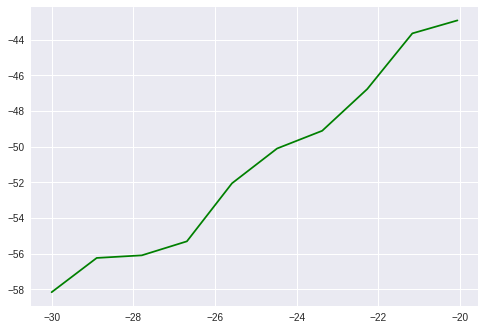

In [85]:
#visualising 10 datapoints
plt.plot(train_X[:10],train_Y[:10],'g')
plt.show()

In [0]:
x=tf.placeholder(tf.float32,name='x')
y=tf.placeholder(tf.float32,name='y')


In [0]:
W = tf.Variable(0.0, name='weight_1')
b = tf.Variable(0.0, name='bias_1')

pred_y = (W*x) + b

In [0]:
loss=tf.reduce_mean(tf.square(y-pred_y))#defining loss function,as mean squared loss

In [0]:
#optimizer defining and specifying which value has to be minimized(in this case=loss)
optimizer=tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)


Loss after epoch 1000  is  48201.82
Loss after epoch 1000  is  32514.393
Loss after epoch 1000  is  21935.615
Loss after epoch 1000  is  14801.842
Loss after epoch 1000  is  9991.2
Loss after epoch 1000  is  6747.1577
Loss after epoch 1000  is  4559.5435
Loss after epoch 1000  is  3084.3308
Loss after epoch 1000  is  2089.5254
Loss after epoch 1000  is  1418.6813
Loss after epoch 1000  is  966.29865
Loss after epoch 1000  is  661.23553
Loss after epoch 1000  is  455.51712
Loss after epoch 1000  is  316.7908
Loss after epoch 1000  is  223.24173
Loss after epoch 1000  is  160.15659
Loss after epoch 1000  is  117.615265
Loss after epoch 1000  is  88.927734
Loss after epoch 1000  is  69.58228
Loss after epoch 1000  is  56.536533
Loss after epoch 1000  is  47.739346
Loss after epoch 1000  is  41.80677
Loss after epoch 1000  is  37.806087
Loss after epoch 1000  is  35.108215
Loss after epoch 1000  is  33.28887
Loss after epoch 1000  is  32.06185
Loss after epoch 1000  is  31.234419
Loss afte

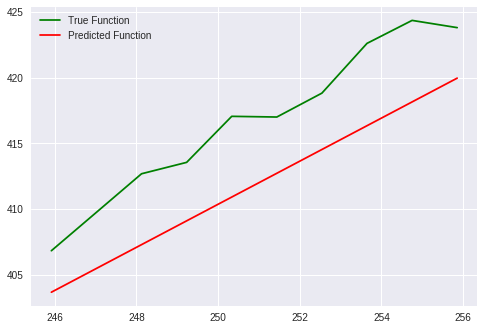

In [92]:
# So the graph is now built
# Now let's execute the graph using session
#train the model
# To update the paramters in the graph (i.e. tf.Variables)
# So that the loss is minimized
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())#initializing variables
  
  for epoch in range(ep):
    _,curr_loss=sess.run([optimizer,loss],feed_dict={x:train_X,y:train_Y})
    if ep % int==0:
      print("Loss after epoch",ep," is ",curr_loss)
   
  print ('Now testing the model in the test set')
  final_preds, final_loss = sess.run([pred_y, loss], feed_dict={x:test_X, y:test_Y})
   
  print("The final loss is:",final_loss)
  
  #Plotting the final predictions against the true predictions
  
  plt.plot(test_X[:10], test_Y[:10], 'g', label='True Function')
  plt.plot(test_X[:10], final_preds[:10], 'r', label='Predicted Function')
  plt.legend()
  plt.show()

In [93]:
linear_regression(learning_rate=0.000005, ep=500)

NameError: ignored

In [94]:
linear_regression(learning_rate=0.0000006,ep=1000)


NameError: ignored